### Tugas Akhir Metode Numerik

1. Angelina Jeany       / 6182001032
2. Neil Christopher     / 6182001010
3. Wilson               / 6182001039
---

**Import Data dan Library**

In [1]:
#Import beberapa library untuk membantu mengerjakan tugas akhir

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statistics
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

data_old = pd.read_csv('diamonds.csv')
data_old

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


**Membersihkan Data**

In [2]:
#Disini kelompok kami membersihkan data (men-drop kolom) unnamed dan value dari x, y, z yang bernilai 0
data = data_old.drop(["Unnamed: 0"], axis=1)
data = data[(data[['x','y','z']] != 0).all(axis=1)]
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


##### **Eksplorasi data sederhana**


Observasi dibawah ini menggunakan heatmap karena bertujuan untuk mencari korelasi antar variable yang bukan merupakan kategorial, seperti depth, carat, price, dst. Berdasarkan hasil pengamatan, depth berbanding terbalik dengan price karena ditandakan dengan nilai negatif. Hal ini disebabkan (berdasarkan pencarian di google) jika presentase Depth terlalu besar atau terlalu kecil, maka berlian tersebut akan menjadi gelap karena tidak dapat memancarkan cahaya yang berkilauan.

Sedangkan untuk carat dan price memiliki korelasi yang kuat karena hampir mendekati 1, sehingga dapat dikatakan bahwa semakin besar atau tinggi carat yang dimiliki oleh berlian, semakin tinggi pula harga yang dimiliki berlian. Scatter plot antara carat dan price juga mendukung visualisasi bahwa price dan carat memiliki hubungan yang kuat, karena grafik tersebut menunjukkan grafik eksponensial.

Untuk atribut kategorial (cut, clarity, color) divisualisasikan dengan menggunakan boxplot agar korelasi dengan price dapat ditentukan.

c:\Users\anton\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\Users\anton\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\Users\anton\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the de

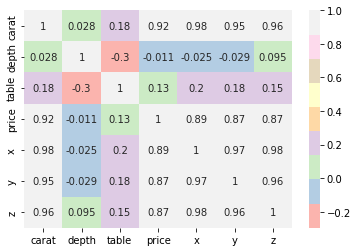

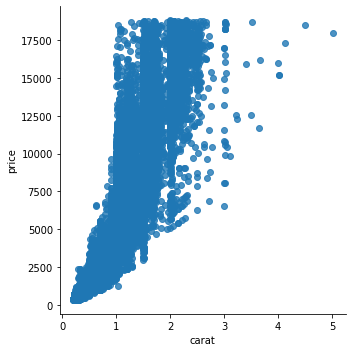

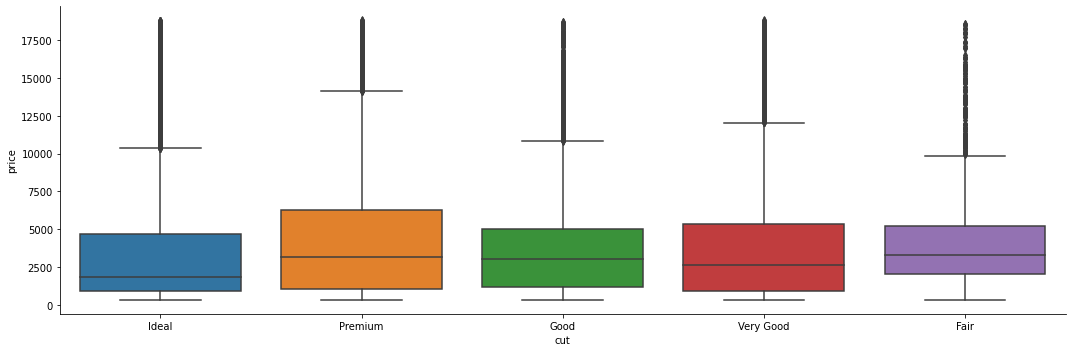

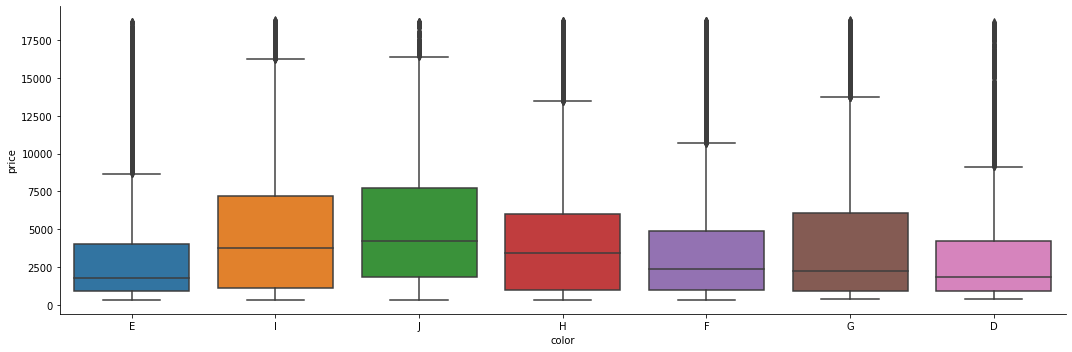

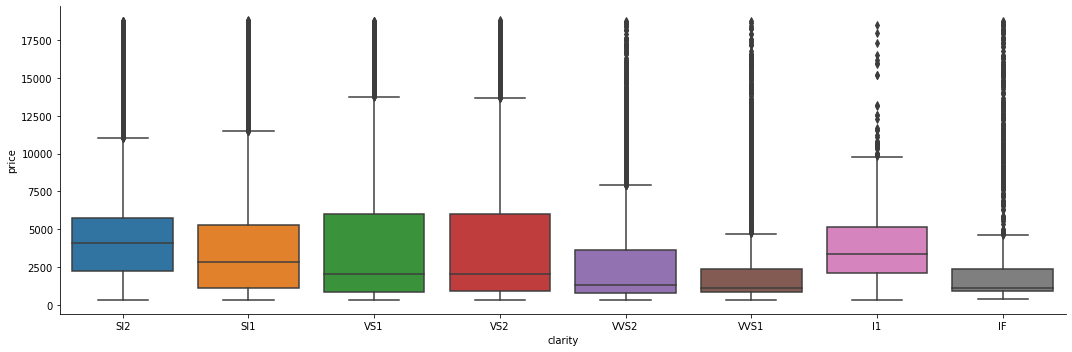

In [3]:
korelasi = data.corr()
sns.heatmap(data=korelasi , annot=True, cmap="Pastel1")
sns.lmplot(x="carat", y="price", data= data, fit_reg= False, palette="Set3")
sns.factorplot(x='cut', y='price', data=data, kind='box' ,aspect=3 )
sns.factorplot(x='color', y='price', data=data, kind='box' ,aspect=3 )
sns.factorplot(x='clarity', y='price', data=data, kind='box' ,aspect=3 )
plt.show()

#### **Mencari Model Terbaik**

In [46]:
#Method berikut digunakan untuk mengembalikan nilai a0 dan a1 sebagai koefisien dari regresi linear
def my_slr(x,y):

    xMean = np.mean(x)
    yMean = np.mean(y)

    N = np.size(x) 
    Sr_xy = 0
    Sr_xx = 0
    for i in range(N):
        Sr_xy += (x[i] - xMean) * (y[i] - yMean)
        Sr_xx += (x[i] - xMean) ** 2
  
    a1 = Sr_xy / Sr_xx
    a0 = yMean - (a1 * xMean)
  
    return (a0, a1)

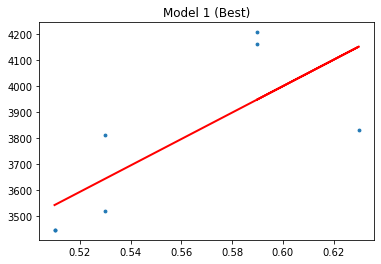

SSE  = 277550.6880
Sy/x = 235.6059
St   = 624147.7143
r2   = 0.5553
 


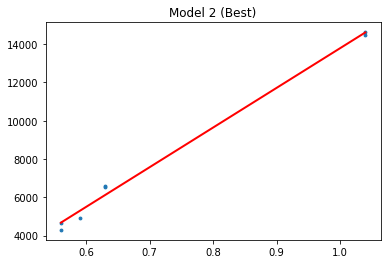

SSE  = 719968.9188
Sy/x = 379.4651
St   = 124716135.4286
r2   = 0.9942
 


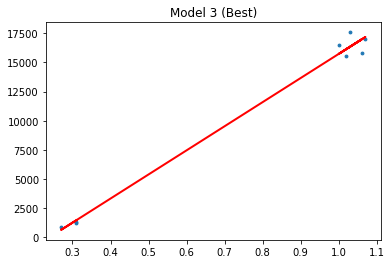

SSE  = 3898841.1081
Sy/x = 806.1060
St   = 444501062.8750
r2   = 0.9912
Cross Validation:  1632120.238321056


In [4]:
#Pada langkah berikut, kelompok kami mem-filter data untuk mendapatkan seluruh data 
#dengan masing-masing atribut kategori berlian terbaik, yaitu Cut = Ideal, Color = D, Clarity = IF

Grades2 = data.loc[(data["cut"] == "Ideal")]
Grades1 = Grades2.loc[(Grades2["color"] == "D")]
GradesFix = Grades1.loc[(Grades1["clarity"] == "IF")]

priceBest = GradesFix["price"]
caratBest = GradesFix["carat"]

y = priceBest.iloc[0:7]
x = caratBest.iloc[0:7]

slope, intercept, r, p, std_err = stats.linregress(x, y)
def myfunc(x):
  return intercept + (slope * x)

mymodel = list(map(myfunc, x))
N = np.size(x) 
xMean = np.mean(x)
yMean = np.mean(y)

yPred =  intercept + (slope * x)
SSE1 = np.sum((y-yPred)**2)
Syx = np.sqrt(SSE1/(N-2))
St = np.sum((y - yMean)**2)
r2 = 1 - (SSE1/St)

plt.title("Model 1 (Best)")
plt.plot(x, mymodel, color="red", linewidth=2)
plt.scatter(x, y, s = 8,)
plt.show()
print('SSE  = %.4f' % SSE1)
print('Sy/x = %.4f' % Syx)
print('St   = %.4f' % St)
print('r2   = %.4f' % r2)
print(" ")


priceBest = GradesFix["price"]
caratBest = GradesFix["carat"]

y = priceBest.iloc[8:15]
x = caratBest.iloc[8:15]

slope, intercept, r, p, std_err = stats.linregress(x, y)
def myfunc(x):
  return intercept + (slope * x)

mymodel = list(map(myfunc, x))
N = np.size(x) 
xMean = np.mean(x)
yMean = np.mean(y)

yPred =  intercept + (slope * x)
SSE2 = np.sum((y-yPred)**2)
Syx = np.sqrt(SSE2/(N-2))
St = np.sum((y - yMean)**2)
r2 = 1 - (SSE2/St)

plt.title("Model 2 (Best)")
plt.plot(x, mymodel, color="red", linewidth=2)
plt.scatter(x, y, s = 8)
plt.show()
print('SSE  = %.4f' % SSE2)
print('Sy/x = %.4f' % Syx)
print('St   = %.4f' % St)
print('r2   = %.4f' % r2)
print(" ")


priceBest = GradesFix["price"]
caratBest = GradesFix["carat"]

y = priceBest.iloc[15:23]
x = caratBest.iloc[15:23]

slope, intercept, r, p, std_err = stats.linregress(x, y)
def myfunc(x):
  return intercept + (slope * x)

mymodel = list(map(myfunc, x))
N = np.size(x) 
xMean = np.mean(x)
yMean = np.mean(y)

yPred =  intercept + (slope * x)
SSE3 = np.sum((y-yPred)**2)
Syx = np.sqrt(SSE3/(N-2))
St = np.sum((y - yMean)**2)
r2 = 1 - (SSE3/St)

plt.title("Model 3 (Best)")
plt.plot(x, mymodel, color="red", linewidth=2)
plt.scatter(x, y, s = 8)
plt.show()
print('SSE  = %.4f' % SSE3)
print('Sy/x = %.4f' % Syx)
print('St   = %.4f' % St)
print('r2   = %.4f' % r2)

print("Cross Validation: ", ((SSE1+SSE2+SSE3) / 3) )

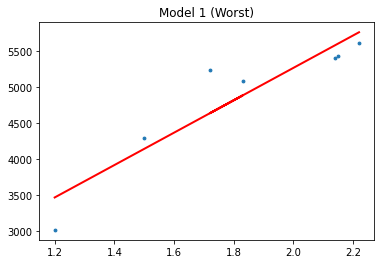

SSE  = 716854.9346
Sy/x = 378.6436
St   = 5124411.4286
r2   = 0.8601
 


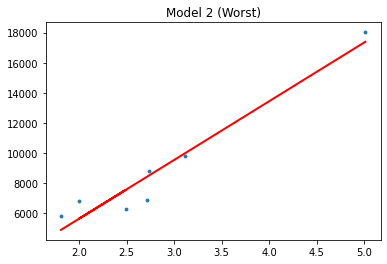

SSE  = 6848890.8906
Sy/x = 1170.3752
St   = 108607470.8571
r2   = 0.9369
 


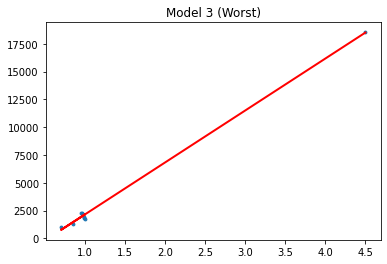

SSE  = 668057.9597
Sy/x = 333.6810
St   = 246645580.8750
r2   = 0.9973
Cross Validation:  2744601.2616457334


In [5]:
#Pada langkah berikut, kelompok kami mem-filter data untuk mendapatkan seluruh data 
#dengan masing-masing atribut kategori berlian terburuk, yaitu Cut = Fair, Color = J, Clarity = I1

Grades2 = data.loc[(data["cut"] == "Fair")]
Grades1 = Grades2.loc[(Grades2["color"] == "J")]
Grades = Grades1.loc[(Grades1["clarity"] == "I1")]


priceWorst = Grades["price"]
caratWorst = Grades["carat"]

y = priceWorst.iloc[0:7]
x = caratWorst.iloc[0:7]

slope, intercept, r, p, std_err = stats.linregress(x, y)
def myfunc(x):
  return intercept + (slope * x)

mymodel = list(map(myfunc, x))
N = np.size(x) 
xMean = np.mean(x)
yMean = np.mean(y)

yPred =  intercept + (slope * x)
SSE1 = np.sum((y-yPred)**2)
Syx = np.sqrt(SSE1/(N-2))
St = np.sum((y - yMean)**2)
r2 = 1 - (SSE1/St)

plt.title("Model 1 (Worst)")
plt.plot(x, mymodel, color="red", linewidth=2)
plt.scatter(x, y, s = 8,)
plt.show()
print('SSE  = %.4f' % SSE1)
print('Sy/x = %.4f' % Syx)
print('St   = %.4f' % St)
print('r2   = %.4f' % r2)
print(" ")



priceWorst = Grades["price"]
caratWorst = Grades["carat"]

y = priceWorst.iloc[8:15]
x = caratWorst.iloc[8:15]

slope, intercept, r, p, std_err = stats.linregress(x, y)
def myfunc(x):
  return intercept + (slope * x)

mymodel = list(map(myfunc, x))
N = np.size(x) 
xMean = np.mean(x)
yMean = np.mean(y)

yPred =  intercept + (slope * x)
SSE2 = np.sum((y-yPred)**2)
Syx = np.sqrt(SSE2/(N-2))
St = np.sum((y - yMean)**2)
r2 = 1 - (SSE2/St)

plt.title("Model 2 (Worst)")
plt.plot(x, mymodel, color="red", linewidth=2)
plt.scatter(x, y, s = 8)
plt.show()
print('SSE  = %.4f' % SSE2)
print('Sy/x = %.4f' % Syx)
print('St   = %.4f' % St)
print('r2   = %.4f' % r2)
print(" ")


priceWorst = Grades["price"]
caratWorst = Grades["carat"]

y = priceWorst.iloc[15:23]
x = caratWorst.iloc[15:23]

slope, intercept, r, p, std_err = stats.linregress(x, y)
def myfunc(x):
  return intercept + (slope * x)

mymodel = list(map(myfunc, x))
N = np.size(x) 
xMean = np.mean(x)
yMean = np.mean(y)

yPred =  intercept + (slope * x)
SSE3 = np.sum((y-yPred)**2)
Syx = np.sqrt(SSE3/(N-2))
St = np.sum((y - yMean)**2)
r2 = 1 - (SSE3/St)

plt.title("Model 3 (Worst)")
plt.plot(x, mymodel, color="red", linewidth=2)
plt.scatter(x, y, s = 8)
plt.show()
print('SSE  = %.4f' % SSE3)
print('Sy/x = %.4f' % Syx)
print('St   = %.4f' % St)
print('r2   = %.4f' % r2)

print("Cross Validation: ", ((SSE1+SSE2+SSE3) / 3) )

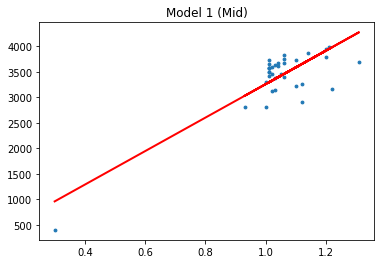

SSE  = 3800450.4763
Sy/x = 339.3599
St   = 12255279.5429
r2   = 0.6899
 


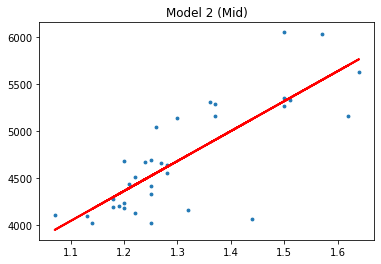

SSE  = 4108435.8082
Sy/x = 358.3136
St   = 11215044.4706
r2   = 0.6337
 


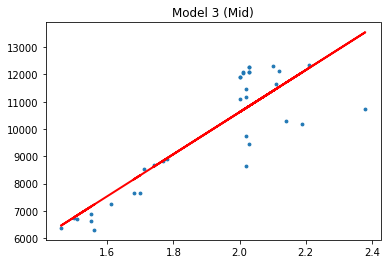

SSE  = 39519664.9814
Sy/x = 1111.3008
St   = 153838080.7353
r2   = 0.7431
Cross Validation:  15809517.08864335


In [6]:
#Pada langkah berikut, kelompok kami mem-filter data untuk mendapatkan seluruh data 
#dengan masing-masing atribut kategori yang paling mempengaruhi harga berlian berdasarkan hasil analisis boxplot
#yaitu Cut = Premium, Color = J, Clarity = SI2

Grades2 = data.loc[(data["cut"] == "Premium")]
Grades1 = Grades2.loc[(Grades2["color"] == "J")]
Grades = Grades1.loc[(Grades1["clarity"] == "SI2")]

priceMid = Grades["price"]
caratMid = Grades["carat"]

y = priceMid.iloc[0:35]
x = caratMid.iloc[0:35]

slope, intercept, r, p, std_err = stats.linregress(x, y)
def myfunc(x):
  return intercept + (slope * x)

mymodel = list(map(myfunc, x))
N = np.size(x) 
xMean = np.mean(x)
yMean = np.mean(y)

yPred =  intercept + (slope * x)
SSE1 = np.sum((y-yPred)**2)
Syx = np.sqrt(SSE1/(N-2))
St = np.sum((y - yMean)**2)
r2 = 1 - (SSE1/St)

plt.title("Model 1 (Mid)")
plt.plot(x, mymodel, color="red", linewidth=2)
plt.scatter(x, y, s = 8,)
plt.show()
print('SSE  = %.4f' % SSE1)
print('Sy/x = %.4f' % Syx)
print('St   = %.4f' % St)
print('r2   = %.4f' % r2)
print(" ")



priceMid = Grades["price"]
caratMid = Grades["carat"]

y = priceMid.iloc[36:70]
x = caratMid.iloc[36:70]

slope, intercept, r, p, std_err = stats.linregress(x, y)
def myfunc(x):
  return intercept + (slope * x)

mymodel = list(map(myfunc, x))
N = np.size(x) 
xMean = np.mean(x)
yMean = np.mean(y)

yPred =  intercept + (slope * x)
SSE2 = np.sum((y-yPred)**2)
Syx = np.sqrt(SSE2/(N-2))
St = np.sum((y - yMean)**2)
r2 = 1 - (SSE2/St)

plt.title("Model 2 (Mid)")
plt.plot(x, mymodel, color="red", linewidth=2)
plt.scatter(x, y, s = 8)
plt.show()
print('SSE  = %.4f' % SSE2)
print('Sy/x = %.4f' % Syx)
print('St   = %.4f' % St)
print('r2   = %.4f' % r2)
print(" ")


priceMid = Grades["price"]
caratMid = Grades["carat"]

y = priceMid.iloc[71:105]
x = caratMid.iloc[71:105]

slope, intercept, r, p, std_err = stats.linregress(x, y)
def myfunc(x):
  return intercept + (slope * x)

mymodel = list(map(myfunc, x))
N = np.size(x) 
xMean = np.mean(x)
yMean = np.mean(y)

yPred =  intercept + (slope * x)
SSE3 = np.sum((y-yPred)**2)
Syx = np.sqrt(SSE3/(N-2))
St = np.sum((y - yMean)**2)
r2 = 1 - (SSE3/St)

plt.title("Model 3 (Mid)")
plt.plot(x, mymodel, color="red", linewidth=2)
plt.scatter(x, y, s = 8)
plt.show()
print('SSE  = %.4f' % SSE3)
print('Sy/x = %.4f' % Syx)
print('St   = %.4f' % St)
print('r2   = %.4f' % r2)

print("Cross Validation: ", ((SSE1+SSE2+SSE3) / 3) )

In [66]:
GradesCut = data.loc[(data["cut"] == "Ideal")]
GradesColor = data.loc[(data["color"] == "D")]
GradesClarity = data.loc[(data["clarity"] == "IF")]

GradesCut

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
11,0.23,Ideal,J,VS1,62.8,56.0,340,3.93,3.90,2.46
13,0.31,Ideal,J,SI2,62.2,54.0,344,4.35,4.37,2.71
16,0.30,Ideal,I,SI2,62.0,54.0,348,4.31,4.34,2.68
39,0.33,Ideal,I,SI2,61.8,55.0,403,4.49,4.51,2.78
...,...,...,...,...,...,...,...,...,...,...
53925,0.79,Ideal,I,SI1,61.6,56.0,2756,5.95,5.97,3.67
53926,0.71,Ideal,E,SI1,61.9,56.0,2756,5.71,5.73,3.54
53929,0.71,Ideal,G,VS1,61.4,56.0,2756,5.76,5.73,3.53
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50


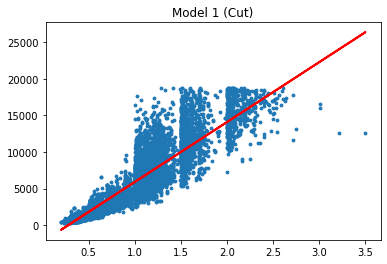

SSE  = 41532592797.9595
Sy/x = 1388.3891
St   = 312465499148.5018
r2   = 0.8671
 


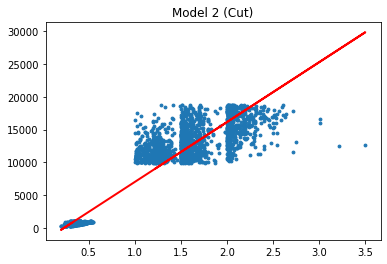

SSE  = 16512776529.0142
Sy/x = 1516.5189
St   = 227495810017.4581
r2   = 0.9274
 


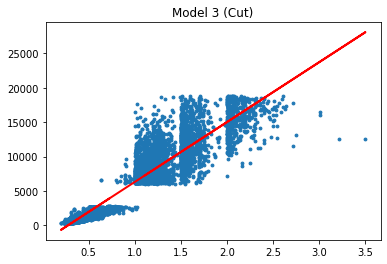

SSE  = 30656553137.8513
Sy/x = 1352.6221
St   = 300999131829.4995
r2   = 0.8982
Cross Validation:  1764369.7033222937


In [104]:
GradesCut = data.loc[(data["cut"] == "Ideal")]
GradesColor = data.loc[(data["color"] == "D")]
GradesClarity = data.loc[(data["clarity"] == "IF")]

priceCut = GradesCut["price"]
caratCut = GradesCut["carat"]

N = np.size(GradesCut)

y = priceCut.iloc[0:int(N/3)]
x = caratCut.iloc[0:int(N/3)]

slope, intercept, r, p, std_err = stats.linregress(x, y)
def myfunc(x):
  return intercept + (slope * x)

mymodel = list(map(myfunc, x))
N = np.size(x) 
xMean = np.mean(x)
yMean = np.mean(y)

yPred =  intercept + (slope * x)
SSE1 = np.sum((y-yPred)**2)
Syx = np.sqrt(SSE1/(N-2))
St = np.sum((y - yMean)**2)
r2 = 1 - (SSE1/St)

plt.title("Model 1 (Cut)")
plt.plot(x, mymodel, color="red", linewidth=2)
plt.scatter(x, y, s = 8,)
plt.show()
print('SSE  = %.4f' % SSE1)
print('Sy/x = %.4f' % Syx)
print('St   = %.4f' % St)
print('r2   = %.4f' % r2)
print(" ")



priceCut = GradesCut["price"]
caratCut = GradesCut["carat"]

y = priceCut.iloc[int(N/3+1) : int(N*2/3)]
x = caratCut.iloc[int(N/3+1) : int(N*2/3)]

slope, intercept, r, p, std_err = stats.linregress(x, y)
def myfunc(x):
  return intercept + (slope * x)

mymodel = list(map(myfunc, x))
N = np.size(x) 
xMean = np.mean(x)
yMean = np.mean(y)

yPred =  intercept + (slope * x)
SSE2 = np.sum((y-yPred)**2)
Syx = np.sqrt(SSE2/(N-2))
St = np.sum((y - yMean)**2)
r2 = 1 - (SSE2/St)

plt.title("Model 2 (Cut)")
plt.plot(x, mymodel, color="red", linewidth=2)
plt.scatter(x, y, s = 8)
plt.show()
print('SSE  = %.4f' % SSE2)
print('Sy/x = %.4f' % Syx)
print('St   = %.4f' % St)
print('r2   = %.4f' % r2)
print(" ")


priceCut = GradesCut["price"]
caratCut = GradesCut["carat"]

y = priceCut.iloc[int(N*2/3 +1) : -1]
x = caratCut.iloc[int(N*2/3 +1) : -1]

slope, intercept, r, p, std_err = stats.linregress(x, y)
def myfunc(x):
  return intercept + (slope * x)

mymodel = list(map(myfunc, x))
N = np.size(x) 
xMean = np.mean(x)
yMean = np.mean(y)

yPred =  intercept + (slope * x)
SSE3 = np.sum((y-yPred)**2)
Syx = np.sqrt(SSE3/(N-2))
St = np.sum((y - yMean)**2)
r2 = 1 - (SSE3/St)

plt.title("Model 3 (Cut)")
plt.plot(x, mymodel, color="red", linewidth=2)
plt.scatter(x, y, s = 8)
plt.show()
print('SSE  = %.4f' % SSE3)
print('Sy/x = %.4f' % Syx)
print('St   = %.4f' % St)
print('r2   = %.4f' % r2)

print("Cross Validation: ", ((SSE1+SSE2+SSE3) / 3) / N )

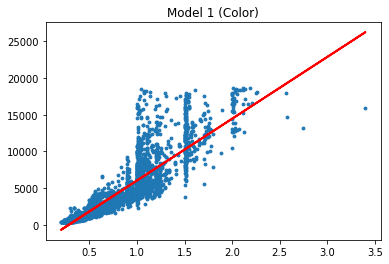

SSE  = 14335720121.2409
Sy/x = 1454.9608
St   = 76163969580.2594
r2   = 0.8118
 


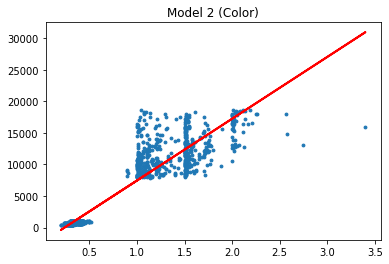

SSE  = 7033586165.2917
Sy/x = 1766.0994
St   = 60258169582.3536
r2   = 0.8833
 


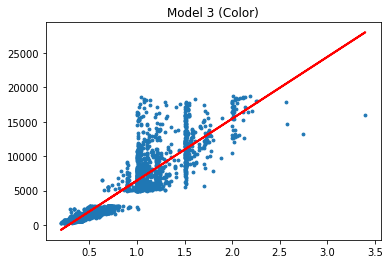

SSE  = 11515400074.2646
Sy/x = 1478.7647
St   = 73904076524.3030
r2   = 0.8442
Cross Validation:  2080783.7484685627


In [105]:
GradesCut = data.loc[(data["cut"] == "Ideal")]
GradesColor = data.loc[(data["color"] == "D")]
GradesClarity = data.loc[(data["clarity"] == "IF")]

priceColor = GradesColor["price"]
caratColor = GradesColor["carat"]

N = np.size(GradesColor)

y = priceColor.iloc[0:int(N/3)]
x = caratColor.iloc[0:int(N/3)]

slope, intercept, r, p, std_err = stats.linregress(x, y)
def myfunc(x):
  return intercept + (slope * x)

mymodel = list(map(myfunc, x))
N = np.size(x) 
xMean = np.mean(x)
yMean = np.mean(y)

yPred =  intercept + (slope * x)
SSE1 = np.sum((y-yPred)**2)
Syx = np.sqrt(SSE1/(N-2))
St = np.sum((y - yMean)**2)
r2 = 1 - (SSE1/St)

plt.title("Model 1 (Color)")
plt.plot(x, mymodel, color="red", linewidth=2)
plt.scatter(x, y, s = 8,)
plt.show()
print('SSE  = %.4f' % SSE1)
print('Sy/x = %.4f' % Syx)
print('St   = %.4f' % St)
print('r2   = %.4f' % r2)
print(" ")



priceColor = GradesColor["price"]
caratColor = GradesColor["carat"]

y = priceColor.iloc[int(N/3+1) : int(N*2/3)]
x = caratColor.iloc[int(N/3+1) : int(N*2/3)]

slope, intercept, r, p, std_err = stats.linregress(x, y)
def myfunc(x):
  return intercept + (slope * x)

mymodel = list(map(myfunc, x))
N = np.size(x) 
xMean = np.mean(x)
yMean = np.mean(y)

yPred =  intercept + (slope * x)
SSE2 = np.sum((y-yPred)**2)
Syx = np.sqrt(SSE2/(N-2))
St = np.sum((y - yMean)**2)
r2 = 1 - (SSE2/St)

plt.title("Model 2 (Color)")
plt.plot(x, mymodel, color="red", linewidth=2)
plt.scatter(x, y, s = 8)
plt.show()
print('SSE  = %.4f' % SSE2)
print('Sy/x = %.4f' % Syx)
print('St   = %.4f' % St)
print('r2   = %.4f' % r2)
print(" ")


priceColor = GradesColor["price"]
caratColor = GradesColor["carat"]

y = priceColor.iloc[int(N*2/3 +1) : -1]
x = caratColor.iloc[int(N*2/3 +1) : -1]

slope, intercept, r, p, std_err = stats.linregress(x, y)
def myfunc(x):
  return intercept + (slope * x)

mymodel = list(map(myfunc, x))
N = np.size(x) 
xMean = np.mean(x)
yMean = np.mean(y)

yPred =  intercept + (slope * x)
SSE3 = np.sum((y-yPred)**2)
Syx = np.sqrt(SSE3/(N-2))
St = np.sum((y - yMean)**2)
r2 = 1 - (SSE3/St)

plt.title("Model 3 (Color)")
plt.plot(x, mymodel, color="red", linewidth=2)
plt.scatter(x, y, s = 8)
plt.show()
print('SSE  = %.4f' % SSE3)
print('Sy/x = %.4f' % Syx)
print('St   = %.4f' % St)
print('r2   = %.4f' % r2)

print("Cross Validation: ", ((SSE1+SSE2+SSE3) / 3) / N)

Berikut merupakan hasil Cross Validation dari ketiga buah model regresi yang kami gunakan
ModelBest  = 1632120.23
ModelWorst = 2744601.26
ModelMid   = 15809517.08

Berdasarkan dari hasil pengamatan pada data Cross Validation di atas, didapati bahwa ModelBest memiliki nilai validasi(Sr) yang paling rendah dibandingkan dengan 2 buah model yang lain. 
Oleh karena itu, dapat disimpulkan bahwa modelBest merupakan model terbaik untuk memprediksi harga dari sebuah berlian.


Berikut merupakan hasil Cross Validation dari 2 buah model regresi yang kami gunakan
ModelColor = 2080783.74
ModelCut = 1764369.70

Berdasarkan dari hasil pengamatan pada data Cross Validation di atas, didapati bahwa ModelCut memiliki nilai validasi(Sr) yang paling rendah dibandingkan dengan modelColor. 
Oleh karena itu, dapat disimpulkan bahwa modelCut merupakan model terbaik untuk memprediksi harga dari sebuah berlian.


##### **Atribut Numerik**
Penggunaan atribut numerik pada eksplorasi data kali ini adalah:

- price
- carat

Berdasarkan hasil ekslporasi data di atas, kelompok kami menggunakan aribut price dan karat karena memiliki korelasi yang sangat kuat

##### **Prediksi**

In [100]:
#Dibawah ini merupakan method untuk mencari nilai prediksi dari atribut numerik yang kami tentukan yaitu cut = ideal
#Hasil prediksi tidak berbeda jauh dengan harga asli dari berlian jika kategori cut = ideal
GradesClarity = data.loc[(data["cut"] == "Ideal")]

price = GradesClarity["price"]
carat = GradesClarity["carat"]

caratV = carat.values
priceV = price.values
x = statistics.mean(caratV)
y = statistics.mean(priceV)
for j in range(len(Grades)):
    a1 = a1 + ((caratV[j]-x) * (priceV[j]-y))
    temp = temp + ((caratV[j]-x) ** 2) + ((priceV[j]-y) ** 2)
a1 = a1/temp
a0 = y - (a1*x)

def predictC (a1, a0, carat):
    price = a1 + (a0 * carat)
    return price

In [101]:
print("Nilai Prediksi =", round(predictC(a1,a0,1)))
print("Nilai Prediksi =", round(predictC(a1,a0,0.90)))
print("Nilai Prediksi =", round(predictC(a1,a0,0.83)))

Nilai Prediksi = 3456
Nilai Prediksi = 3110
Nilai Prediksi = 2868


In [7]:
#Memberi label pada tipe data kategorial (Cut, Color, Clarity) sehingga 
#data awal yang berupa diubah string diubah menjadi nomor kode yang berupa integer
#Data-data tersebut diubah agar dapat dilakukan perbadingan menggunakan cross validatio 

Grades2 = data.loc[(data["cut"] == "Ideal")]
Grades1 = Grades2.loc[(Grades2["color"] == "D")]
GradesFix = Grades1.loc[(Grades1["clarity"] == "IF")]

kategori = (data.dtypes == "object")
kolom = list(kategori[kategori].index)

newData = GradesFix.copy()
label = LabelEncoder()
for col in kolom:
    newData[col] = label.fit_transform(newData[col])
newData.head()


,carat,cut,color,clarity,depth,table,price,x,y,z
3680,0.51,0,0,0,62.0,56.0,3446,5.14,5.18,3.20
3682,0.51,0,0,0,62.1,55.0,3446,5.12,5.13,3.19
4000,0.53,0,0,0,61.5,54.0,3517,5.27,5.21,3.22
5345,0.53,0,0,0,62.2,55.0,3812,5.17,5.19,3.22
5457,0.63,0,0,0,61.2,53.0,3832,5.55,5.60,3.41


In [8]:
y = newData['price'].copy()
X = newData.drop(['price'], axis=1).copy() 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

reg= Pipeline([("scalar1",StandardScaler()), ("lr_classifier",LinearRegression())])
reg.fit(X_train, y_train)

linear = LinearRegression()
linear.fit(X_train, y_train)
predict = linear.predict(X_test)

y_test = np.array(list(y_test))

result = pd.DataFrame({'Data Awal': y_test, 'Prediksi': predict, 'Perbedaan': predict-y_test})
result



,Data Awal,Prediksi,Perbedaan
0,4916,5128.050314,212.050314
1,2346,1965.346220,-380.653780
2,6549,5238.666659,-1310.333341
3,893,2988.716471,2095.716471
4,1251,1690.513333,439.513333
5,3517,4600.270388,1083.270388
